<a href="https://colab.research.google.com/github/xxyplxx/STAT1951-Assignment/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
%matplotlib inline

In [2]:
train_df = pd.read_csv("http://kaggle.shikanon.com/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("http://kaggle.shikanon.com/house-prices-advanced-regression-techniques/test.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
alldata = pd.concat((train_df.loc[:,'MSSubClass':'SaleCondition'], test_df.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Data fields
*   SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
*   MSSubClass: The building class
*   MSZoning: The general zoning classification
*   LotFrontage: Linear feet of street connected to property
*   LotArea: Lot size in square feet
*   Street: Type of road access
*   Alley: Type of alley access
*   LotShape: General shape of property
*   LandContour: Flatness of the property
*   Utilities: Type of utilities available
*   LotConfig: Lot configuration
*   LandSlope: Slope of property
*   Neighborhood: Physical locations within Ames city limits
*   Condition1: Proximity to main road or railroad
*   Condition2: Proximity to main road or railroad (if a second is present)
*   BldgType: Type of dwelling
*   HouseStyle: Style of dwelling
*   OverallQual: Overall material and finish quality
*   OverallCond: Overall condition rating
*   YearBuilt: Original construction date
*   YearRemodAdd: Remodel date
*   RoofStyle: Type of roof
*   RoofMatl: Roof material
*   Exterior1st: Exterior covering on house
*   Exterior2nd: Exterior covering on house (if more than one material)
*   MasVnrType: Masonry veneer type
*   MasVnrArea: Masonry veneer area in square feet
*   ExterQual: Exterior material quality
*   ExterCond: Present condition of the material on the exterior
*   Foundation: Type of foundation
*   BsmtQual: Height of the basement
*   BsmtCond: General condition of the basement
*   BsmtExposure: Walkout or garden level basement walls
*   BsmtFinType1: Quality of basement finished area
*   BsmtFinSF1: Type 1 finished square feet
*   BsmtFinType2: Quality of second finished area (if present)
*   BsmtFinSF2: Type 2 finished square feet
*   BsmtUnfSF: Unfinished square feet of basement area
*   TotalBsmtSF: Total square feet of basement area
*   Heating: Type of heating
*   HeatingQC: Heating quality and condition
*   CentralAir: Central air conditioning
*   Electrical: Electrical system
*   1stFlrSF: First Floor square feet
*   2ndFlrSF: Second floor square feet
*   LowQualFinSF: Low quality finished square feet (all floors)
*   GrLivArea: Above grade (ground) living area square feet
*   BsmtFullBath: Basement full bathrooms
*   BsmtHalfBath: Basement half bathrooms
*   FullBath: Full bathrooms above grade
*   HalfBath: Half baths above grade
*   Bedroom: Number of bedrooms above basement level
*   Kitchen: Number of kitchens
*   KitchenQual: Kitchen quality
*   TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*   Functional: Home functionality rating
*   Fireplaces: Number of fireplaces
*   FireplaceQu: Fireplace quality
*   GarageType: Garage location
*   GarageYrBlt: Year garage was built
*   GarageFinish: Interior finish of the garage
*   GarageCars: Size of garage in car capacity
*   GarageArea: Size of garage in square feet
*   GarageQual: Garage quality
*   GarageCond: Garage condition
*   PavedDrive: Paved driveway
*   WoodDeckSF: Wood deck area in square feet
*   OpenPorchSF: Open porch area in square feet
*   EnclosedPorch: Enclosed porch area in square feet
*   3SsnPorch: Three season porch area in square feet
*   ScreenPorch: Screen porch area in square feet
*   PoolArea: Pool area in square feet
*   PoolQC: Pool quality
*   Fence: Fence quality
*   MiscFeature: Miscellaneous feature not covered in other categories
*   MiscVal: $Value of miscellaneous feature
*   MoSold: Month Sold
*   YrSold: Year Sold
*   SaleType: Type of sale
*   SaleCondition: Condition of sale



# Data preprocessing

In [5]:
#Saving Ids for later on use
train_ID = train_df['Id']
test_ID = test_df['Id']

#Dropping Ids
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

## Data observation and visualisation

According to common sense, generally the most relevant to the price of housing is the living area, also known as ’GrLivArea‘, we check the relationship between ’GrLivArea‘ and ’SalePrice‘.

<Figure size 432x288 with 0 Axes>

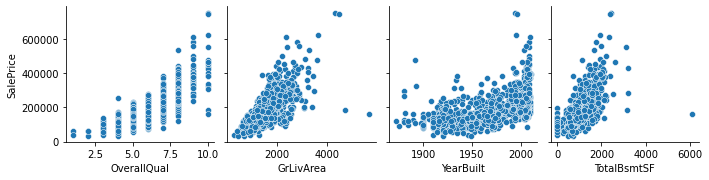

In [6]:
figure=plt.figure()
sns.pairplot(x_vars=['OverallQual','GrLivArea','YearBuilt','TotalBsmtSF'],
             y_vars=['SalePrice'],data=train_df,dropna=True)
plt.show()

With the above scatter plot we can observe that there are some outliers in the training data for example.


1.   OverallQual: the overall quality score is less than 5, but the sales price is greater than 200,000.

2.   GrLivArea: The living area is greater than 4000, but the sales price is less than 300000. According to our common sense, the larger the living area is, the higher the sales price should be.

3.   YearBuilt: the year of construction in 1900 before the sales price can also be greater than 400000.

4.   TotalBsmtSF: the total basement area is greater than 6000, the sales price is still less than 200000.

Combining the above analysis, we will remove these outliers.

In [7]:
train_df = train_df.drop(train_df[(train_df['OverallQual']<5) &
                                        (train_df['SalePrice']>200000)].index)
 
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) &
                                        (train_df['SalePrice']<300000)].index)
 
train_df = train_df.drop(train_df[(train_df['YearBuilt']<1900) &
                                        (train_df['SalePrice']>400000)].index)

train_df = train_df.drop(train_df[(train_df['TotalBsmtSF']>6000) &
                                        (train_df['SalePrice']<200000)].index)

<Figure size 432x288 with 0 Axes>

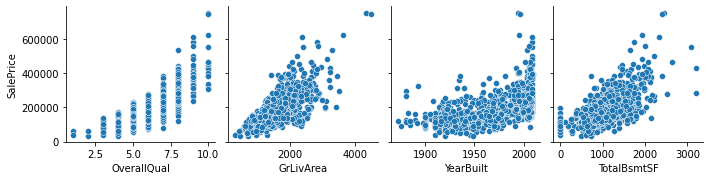

In [8]:
# check if there's still outliers
figure=plt.figure()
sns.pairplot(x_vars=['OverallQual','GrLivArea','YearBuilt','TotalBsmtSF'],
             y_vars=['SalePrice'],data=train_df,dropna=True)
plt.show()

## Data distribution

In [9]:
train_df['SalePrice'].describe()

count      1456.000000
mean     180679.392857
std       79150.362270
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


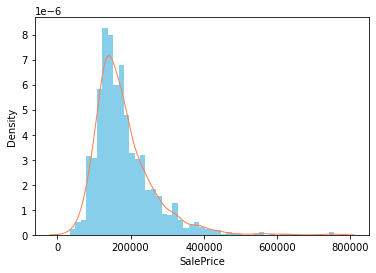

In [10]:
# Mapping the distribution
sns.distplot(train_df['SalePrice'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"})

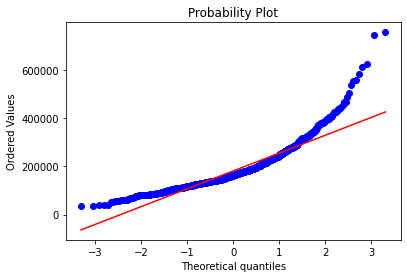

In [11]:
# plot p-p diagram
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], dist="norm", plot=plt)
plt.show()

The red line is the normal distribution, the blue line is our data, we can see that the head and tail of our data are seriously deviated from the normal distribution, we try to do transformation on the data, common transformation are exponential transformation, logarithmic transformation, power function and so on.

### Logarithmic transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


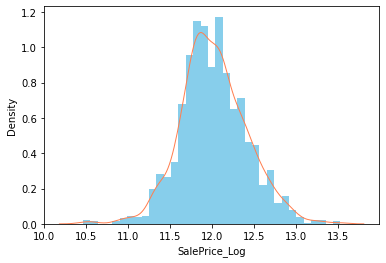

In [12]:
# Logarithmic transformation
train_df['SalePrice_Log'] = np.log(train_df['SalePrice'])

sns.distplot(train_df['SalePrice_Log'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

Skewness: 0.116826
Kurtosis: 0.809269


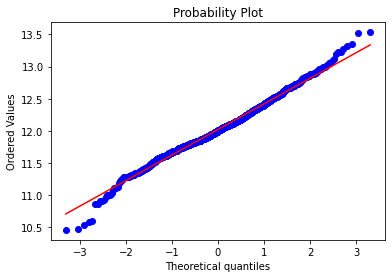

In [13]:
print("Skewness: %f" % train_df['SalePrice_Log'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Log'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Log'], plot=plt)
plt.show()

### Exponential transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


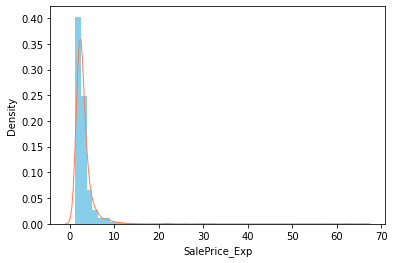

In [14]:
# exponential transformation
train_df['SalePrice_Exp'] = np.exp(train_df['SalePrice']/train_df['SalePrice'].mean())

sns.distplot(train_df['SalePrice_Exp'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"})

Skewness: 12.163462
Kurtosis: 209.959496


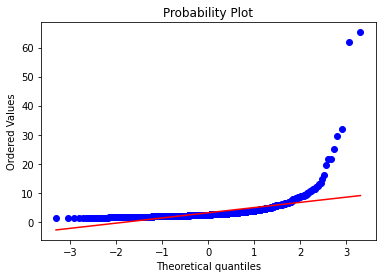

In [15]:
# skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice_Exp'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Exp'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Exp'], plot=plt)
plt.show()

### Power function transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


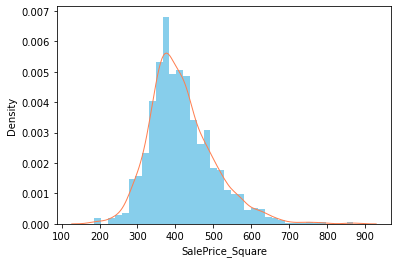

In [16]:
# Power function transformations
train_df['SalePrice_Square'] = train_df['SalePrice']**0.5

sns.distplot(train_df['SalePrice_Square'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"})

Skewness: 0.938477
Kurtosis: 1.960378


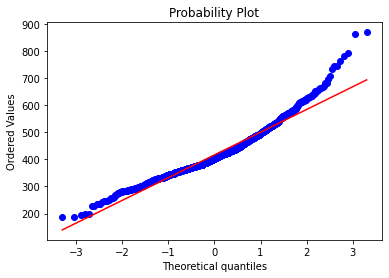

In [17]:
# skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice_Square'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Square'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Square'], plot=plt)
plt.show()

Three function fitting comparison, logarithmic conversion is the most consistent, but we know that logarithm means less than 1 when the negative, which is obviously and cognitive inconsistency, should be used log(1 + x), that is, log1p, to ensure the validity of x data, when x is very small, such as: 10^{-16}, because it is too small than the numerical validity, using log(x + 1) to calculate the result is 0

### Log1p

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.116838
Kurtosis: 0.809256


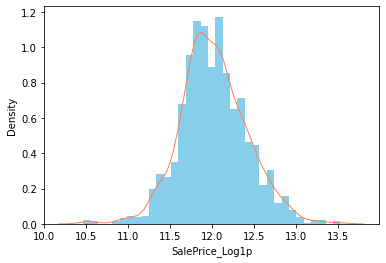

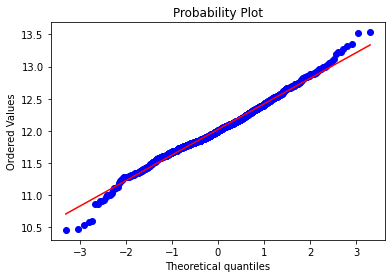

In [18]:
# log1p
train_df['SalePrice_Log1p'] = np.log1p(train_df['SalePrice'])

sns.distplot(train_df['SalePrice_Log1p'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});
 
# skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice_Log1p'].skew())
print("Kurtosis: %f" % train_df['SalePrice_Log1p'].kurt())

fig = plt.figure()
res = stats.probplot(train_df['SalePrice_Log1p'], plot=plt)
plt.show()

In [19]:
del train_df['SalePrice_Square']
del train_df["SalePrice_Exp"]
del train_df['SalePrice_Log']
del train_df["SalePrice"]

## Feature analysis

In [20]:
size_train_df = train_df.shape[0]
size_test_df = test_df.shape[0]
target_variable = train_df['SalePrice_Log1p'].values
data = pd.concat((train_df, test_df),sort=False).reset_index(drop=True) # Merge train and test, then delete the SalePrice column
data.drop(['SalePrice_Log1p'], axis=1, inplace=True)

### Missing value processing

Missing values are a very important piece of practical data analysis, and there are always a large number of missing values in the actual production.

The common missing value processing are.


1.   the missing values as a separate category, such as the category type with none.
2.   Using specific statistical values such as mean, median, and plural to fill in the missing values.
3.   Using methods such as function prediction to fill in the missing values.



Meanings of NA for our variables:


*   NA for 'PoolQC' means "No Pool".

*   MiscFeature: NA means "None"

*   Alley: NA means "No alley access"

*   Fence: NA means "No fence"

*   FireplaceQu: NA means "No fireplace"

*   LotFrontage: fill missing values with median LotFrontage of neighborhood

*   GarageFinish: NA means "None"

*   GarageQual: NA means "None"

*   GarageCond: NA means "None"

*   GarageYrBlt: NA means 0

*   GarageType: NA means "None"

*   BsmtCond: NA means "None"

*   BsmtExposure: NA means "None"

*   BsmtQual: NA means "None"

*   BsmtFinType2: NA means "None"

*   BsmtFinType1: NA means "None"

*   MasVnrType: NA means "None"

*   MasVnrArea: NA means "0"

*   BsmtHalfBath: NA means "0"

*   BsmtFullBath: NA means "0"

*   BsmtFinSF1: NA means "0"

*   BsmtFinSF2: NA means "0"

*   BsmtUnfSF: NA means "0"

*   TotalBsmtSF: NA means "0"

*   GarageCars: NA means 0

*   GarageArea: NA means 0


In [21]:
data.count().sort_values().head(20) # using count() to find out the variables have missing values

PoolQC             9
MiscFeature      105
Alley            198
Fence            570
FireplaceQu     1495
LotFrontage     2430
GarageCond      2756
GarageYrBlt     2756
GarageFinish    2756
GarageQual      2756
GarageType      2758
BsmtExposure    2833
BsmtCond        2833
BsmtQual        2834
BsmtFinType2    2835
BsmtFinType1    2836
MasVnrType      2891
MasVnrArea      2892
MSZoning        2911
BsmtFullBath    2913
dtype: int64

Text(0.5, 1.0, 'Percent missing data by feature')

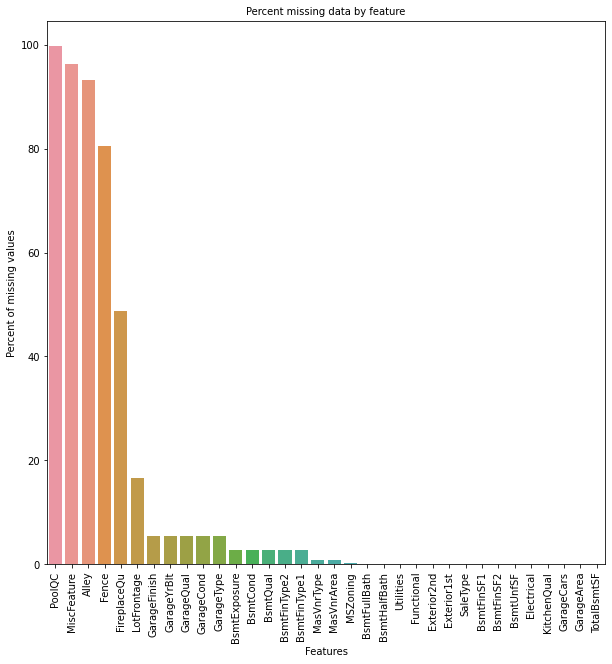

In [22]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na.drop(data_na[data_na==0].index,inplace=True)
data_na = data_na.sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)

In [23]:
# fill in missing values
# fill in None
features_fill_na_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MasVnrType']
# fill in o       
features_fill_na_0 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea',
                      'BsmtFullBath','BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 
                      'BsmtUnfSF', 'TotalBsmtSF']
# fill in mode
features_fill_na_mode = ["Functional", "MSZoning", "SaleType", "Electrical", 
                         "KitchenQual", "Exterior2nd", "Exterior1st"]
                     
for feature_none in features_fill_na_none:
    data[feature_none].fillna('None',inplace=True)
    
for feature_0 in features_fill_na_0:
    data[feature_0].fillna(0,inplace=True)

for feature_mode in features_fill_na_mode:
    mode_value = data[feature_mode].value_counts().sort_values(ascending=False).index[0]
    data[features_fill_na_mode] = data[features_fill_na_mode].fillna(mode_value)                      

In [24]:
# for 'Neighborhood' and 'LotFrontage', fill in with median
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [25]:
# For 'Utilities', where there are only two values in total 
# and one value is used as the primary, are meaningless and should be deleted
data.drop(['Utilities'], axis=1,inplace=True)

In [26]:
data.drop(['MiscFeature'], axis=1,inplace=True)
data.drop(['Fence'], axis=1,inplace=True)
data.drop(['LandSlope'], axis=1,inplace=True)
data.drop(['Exterior2nd'], axis=1,inplace=True)

In [27]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na.drop(data_na[data_na==0].index,inplace=True)
data_na = data_na.sort_values(ascending=False)
data_na

Series([], dtype: float64)

**Data type conversion**, will be some of the actual category type but with the number of mandatory conversion to text, such as some surveys male said 1, female said 0, in this case, if we directly by dataframe type judgment will lead to errors, we have to do conversion according to the actual situation

In [28]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)
 
 
#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)
 
 
#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)


### Relationship matrix

In [29]:
# The relationship matrix tells us intuitively which variables are correlated with each other and which are not
corrmat = train_df.corr()
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log1p
MSSubClass,1.000000,-0.405856,-0.140846,0.030899,-0.060167,0.028265,0.040671,0.022621,-0.073311,-0.065737,-0.141744,-0.252915,-0.262336,0.308342,0.045166,0.076221,0.004205,-0.002383,0.131045,0.176783,-0.024531,0.281787,0.039319,-0.045510,0.084233,-0.040597,-0.100276,-0.011851,-0.006819,-0.012116,-0.043864,-0.028752,0.008073,-0.007704,-0.014294,-0.020923,-0.074324
LotFrontage,-0.405856,1.000000,0.387937,0.234080,-0.058981,0.118693,0.081188,0.164416,0.147792,0.055528,0.139263,0.322835,0.406522,0.064435,0.035556,0.355108,0.077447,-0.004884,0.195860,0.041500,0.273123,-0.003774,0.335463,0.244584,0.060312,0.292735,0.322178,0.082186,0.115151,0.015505,0.074642,0.042045,0.116404,0.005092,0.026240,0.008808,0.372174
LotArea,-0.140846,0.387937,1.000000,0.094450,-0.006608,0.011559,0.005874,0.087384,0.172966,0.116234,-0.002183,0.223179,0.266482,0.041447,-0.004498,0.231416,0.145706,0.051361,0.122979,0.008622,0.123258,-0.016094,0.175336,0.255459,-0.030039,0.151322,0.162685,0.167460,0.055497,-0.015229,0.021965,0.040914,0.036997,0.039690,0.009588,-0.013019,0.257580
OverallQual,0.030899,0.234080,0.094450,1.000000,-0.096700,0.579382,0.551553,0.405497,0.227154,-0.058274,0.307164,0.541159,0.470750,0.285768,-0.055772,0.587230,0.107231,-0.039358,0.548073,0.268426,0.098240,-0.184549,0.416822,0.393179,0.546690,0.600572,0.556703,0.240289,0.294587,-0.113264,0.031208,0.053339,0.044976,-0.031270,0.071773,-0.023868,0.822613
OverallCond,-0.060167,-0.058981,-0.006608,-0.096700,1.000000,-0.372028,0.073916,-0.125749,-0.041444,0.040857,-0.139671,-0.176022,-0.147741,0.025177,0.000914,-0.087026,-0.052444,0.118646,-0.195638,-0.062620,0.010490,-0.086957,-0.063337,-0.027725,-0.326213,-0.189656,-0.154910,-0.001367,-0.037364,0.071216,0.025788,0.040588,0.002481,0.069165,-0.003170,0.046831,-0.042896
YearBuilt,0.028265,0.118693,0.011559,0.579382,-0.372028,1.000000,0.594539,0.312418,0.249521,-0.049442,0.151232,0.401873,0.284501,0.011568,-0.171417,0.203663,0.184552,-0.038430,0.469607,0.243818,-0.069150,-0.175535,0.097852,0.150589,0.828847,0.542270,0.482934,0.223434,0.191869,-0.388881,0.031400,-0.038076,-0.005324,-0.034551,0.012313,-0.015708,0.595299
YearRemodAdd,0.040671,0.081188,0.005874,0.551553,0.073916,0.594539,1.000000,0.176074,0.122999,-0.067222,0.180994,0.294771,0.238349,0.137322,-0.068696,0.287274,0.116777,-0.011840,0.438330,0.181838,-0.040971,-0.149306,0.188368,0.109014,0.642132,0.419796,0.369882,0.204619,0.222471,-0.193384,0.045577,-0.040918,-0.003390,-0.010111,0.022442,0.036503,0.566583
MasVnrArea,0.022621,0.164416,0.087384,0.405497,-0.125749,0.312418,0.176074,1.000000,0.239732,-0.071773,0.114710,0.344188,0.324283,0.167448,-0.067819,0.375328,0.075689,0.028006,0.271625,0.197593,0.103239,-0.037061,0.271590,0.243828,0.249106,0.364307,0.364246,0.156768,0.107162,-0.109740,0.019497,0.067348,-0.020625,-0.029726,-0.004776,-0.007590,0.437402
BsmtFinSF1,-0.073311,0.147792,0.172966,0.227154,-0.041444,0.249521,0.122999,0.239732,1.000000,-0.049575,-0.521661,0.467560,0.395176,-0.162198,-0.061433,0.145779,0.657958,0.073936,0.049551,-0.007519,-0.113140,-0.083064,0.013794,0.243256,0.150248,0.230388,0.274780,0.203716,0.073910,-0.103850,0.029257,0.074992,0.053068,0.004779,-0.003048,0.014695,0.394509
BsmtFinSF2,-0.065737,0.055528,0.116234,-0.058274,0.040857,-0.049442,-0.067222,-0.071773,-0.049575,1.000000,-0.209309,0.114495,0.104489,-0.098666,0.017899,-0.006296,0.160254,0.070771,-0.076064,-0.031628,-0.015617,-0.040926,-0.033764,0.049027,-0.087738,-0.037563,-0.016730,0.068411,0.005926,0.036269,-0.030090,0.091724,0.046328,0.004871,-0.015639,0.031396,0.005612


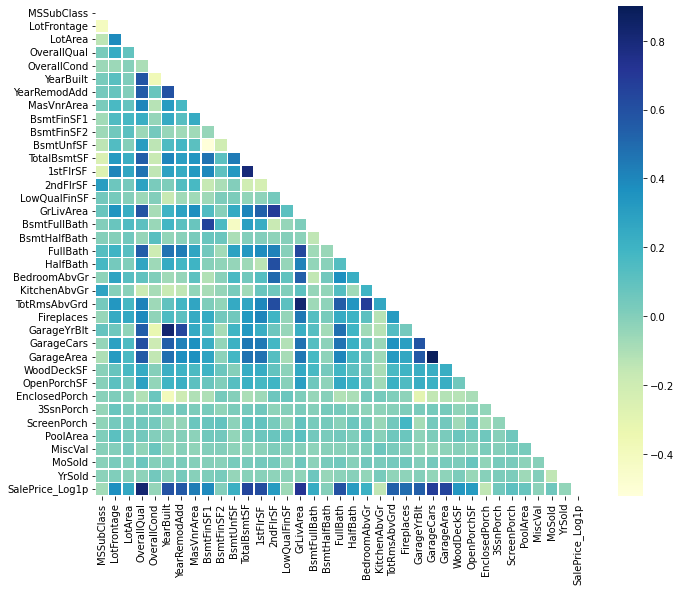

In [30]:
mask = np.zeros_like(corrmat) # Returns a 0 matrix of the same size
mask[np.triu_indices_from(mask)] = True # triu_indices_from: The upper triangular matrix of the function
# Plotting the heat map
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, mask=mask, linewidths=.5, vmax=0.9, square=True, cmap="YlGnBu")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


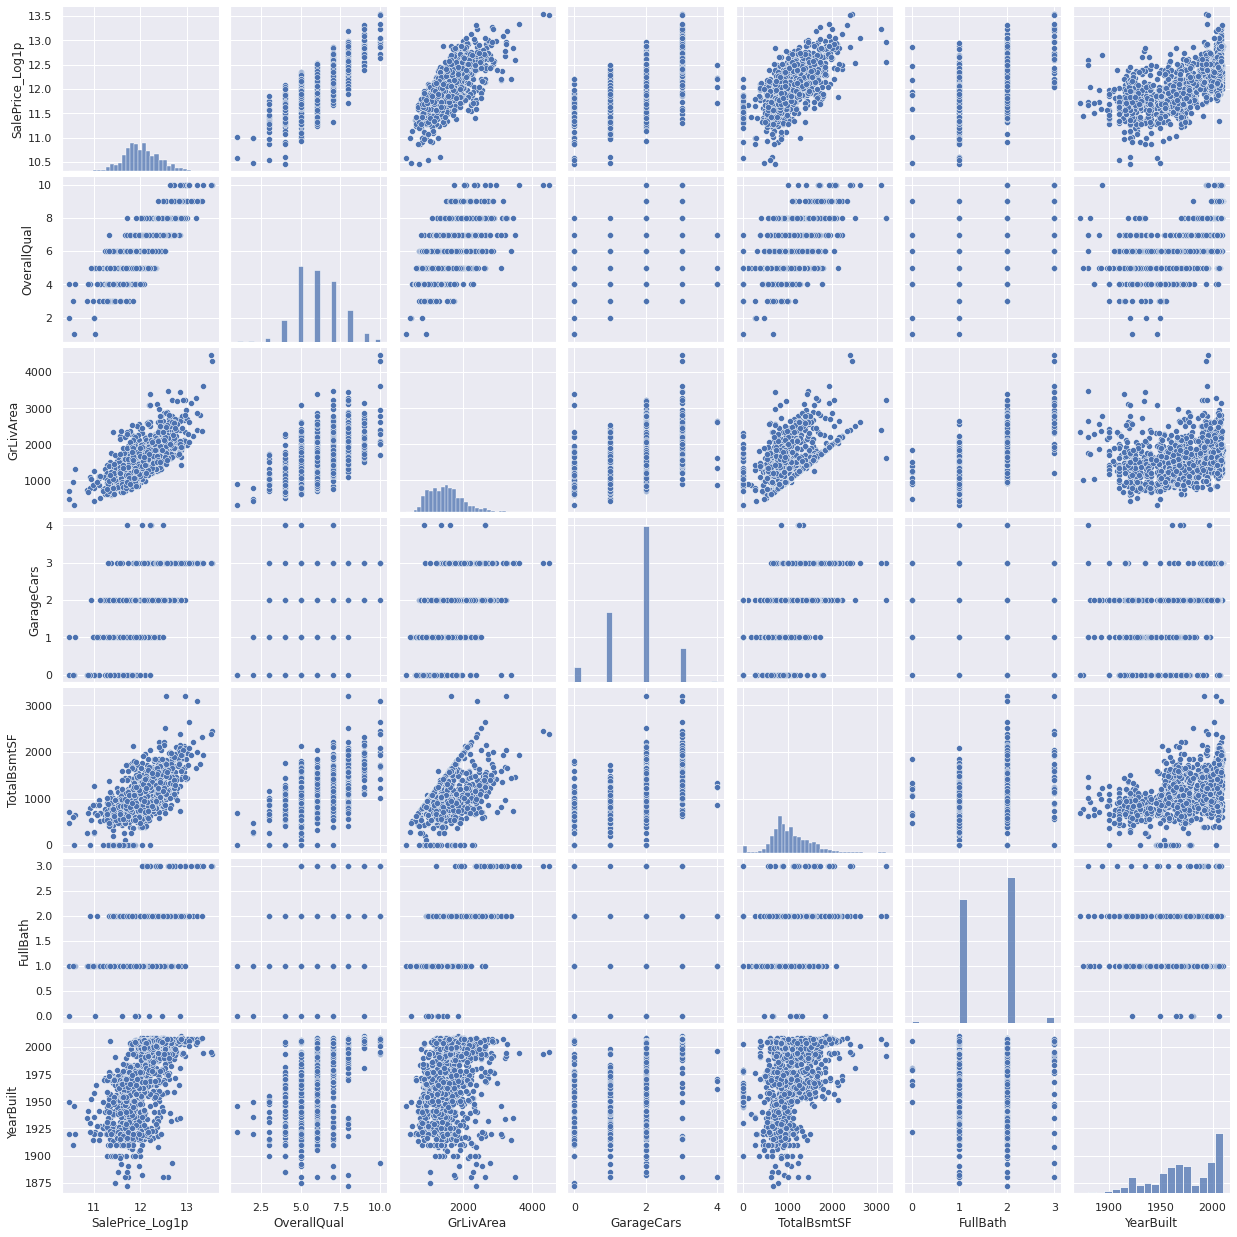

In [31]:
#scatterplot 
sns.set()
cols = ['SalePrice_Log1p', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show()

We can see from the graph, the bluer the pixel is, the stronger the correlation is. In the graph, we can see the variables that have strong correlation with 'SalePrice' are: 


*   OverallQual: Overall material and finish quality
*   YearBuilt: Original construction date
*   ToatlBsmtSF: Total square feet of basement area
*   1stFlrSF: First Floor square feet
*   GrLiveArea: Above grade (ground) living area square feet
*   FullBath: Full bathrooms above grade
*   TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*   GarageCars: Size of garage in car capacity
*   GarageArea: Size of garage in square feet




The few features selected here are only judged by color shades with the naked eye, so they are not very accurate. And the matrix is only numerical, like Neighborhood such discrete data is not involved in the calculation, so the following try to use sklearn to process these features.

# Feature Engineering

Do feature transformation on the data:

For category data, generally use LabelEncoder to turn each category data into numerical type; also can use one-hot into sparse matrix

For numerical data, try to turn it into normal distribution.

In [32]:
encode_cat_variables = ('Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 
                        'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 
                        'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 
                        'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 
                        'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 
                        'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'YrSold')

numerical_features = [col for col in data.columns if col not in encode_cat_variables]

In [33]:
# for variable in encode_cat_variables:
#     lbl = LabelEncoder() 
#     lbl.fit(list(data[variable].values)) 
#     data[variable] = lbl.transform(list(data[variable].values))

for variable in data.columns:
    if variable not in encode_cat_variables:
        data[variable] = data[variable].apply(float)
    else:
        data[variable] = data[variable].apply(str)

print(data.shape)

(2915, 74)


In [34]:
data = pd.get_dummies(data)
print(data.shape)

(2915, 313)


In [35]:
print("Categorical Features: %d"%len(encode_cat_variables))
print("Numerical Features: %d"%len(numerical_features))

Categorical Features: 46
Numerical Features: 32


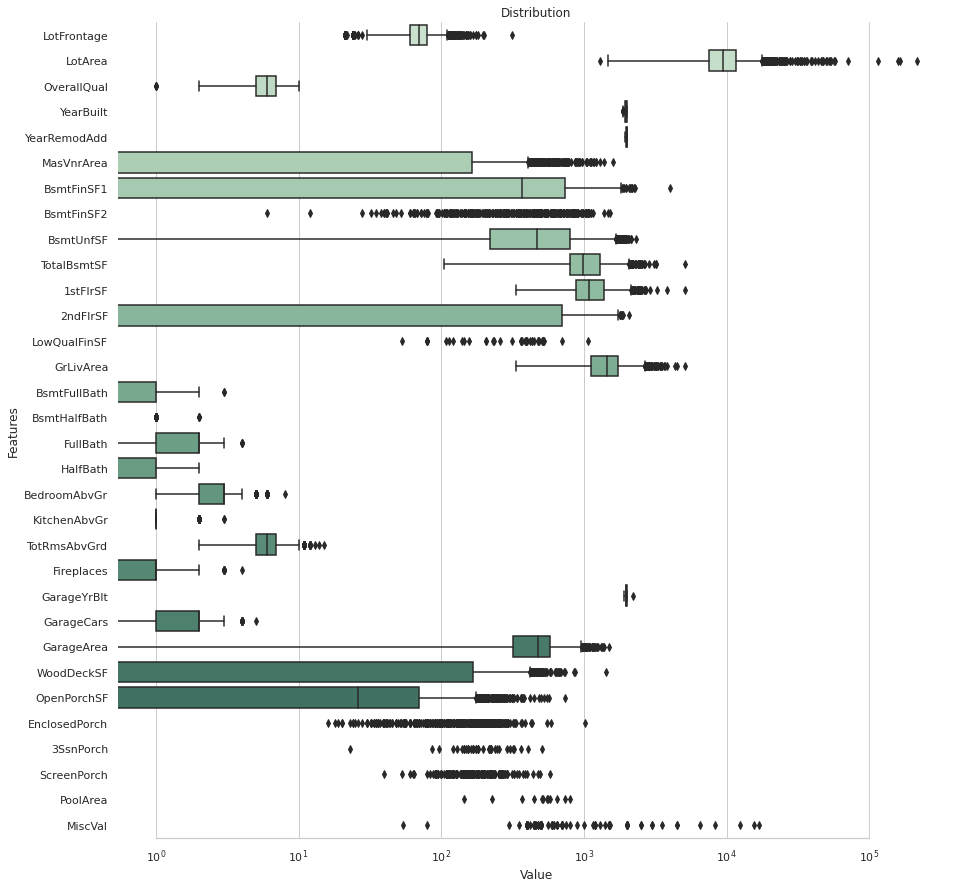

In [36]:
#Boxplot for numerical_features
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 15))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numerical_features] , orient="h", palette="ch:2.5,-.2,dark=.3")
ax.set(ylabel="Features")
ax.set(xlabel="Value")
ax.set(title="Distribution")
sns.despine(trim=True, left=True)

In [37]:
data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,...,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_Typ,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,9600.0,6.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,11250.0,7.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,9550.0,7.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,14260.0,8.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,21.0,1936.0,4.0,1970.0,1970.0,0.0,0.0,0.0,546.0,546.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2911,21.0,1894.0,4.0,1970.0,1970.0,0.0,252.0,0.0,294.0,546.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1970.0,1.0,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2912,160.0,20000.0,5.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,7.0,1.0,1960.0,2.0,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2913,62.0,10441.0,5.0,1992.0,1992.0,0.0,337.0,0.0,575.0,912.0,970.0,0.0,0.0,970.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,0.0,80.0,32.0,0.0,0.0,0.0,0.0,700.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [38]:
# After the features are processed, the data can be split up again
train = data[:size_train_df]
test = data[size_train_df:]

## Explore outliers and delete

(Exploring outliers drawing on https://www.kaggle.com/jack89roberts/top-7-using-elasticnet-with-interactions, we trained the training set using Ridge and ElasticNet, and predicted the training set to find the two (the samples that were not predicted well in either algorithm were used as outliers)

### Using Ridge to find outliers

In [39]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge, LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 
from sklearn import linear_model
import xgboost as xgb
import lightgbm as lgb
import numpy as np
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

In [158]:
# rr = Ridge(alpha=10)
# rr.fit(train.values, target_variable)
# np.sqrt(-cross_val_score(rr, train.values, target_variable, cv=5, scoring="neg_mean_squared_error")).mean()

In [159]:
# y_pred = rr.predict(train.values)
# resid = target_variable - y_pred
# mean_resid = resid.mean()
# std_resid = resid.std()
# z = (resid - mean_resid) / std_resid
# z = np.array(z)
# outliers1 = np.where(abs(z) > abs(z).std() * 3)[0]
# outliers1

In [160]:
# plt.figure(figsize=(6, 6))
# plt.scatter(target_variable, y_pred)
# plt.scatter(target_variable[outliers1], y_pred[outliers1])
# plt.plot(range(10, 15), range(10, 15), color="red")

### Using Elastic Net to find outliers

In [161]:
# enet = ElasticNet(alpha=0.001, l1_ratio=0.58)
# enet.fit(train.values, target_variable)
# np.sqrt(-cross_val_score(enet, train.values, target_variable, cv=5, scoring="neg_mean_squared_error")).mean()

In [162]:
# y_pred = enet.predict(train.values)
# resid = target_variable - y_pred
# mean_resid = resid.mean()
# std_resid = resid.std()
# z = (resid - mean_resid) / std_resid
# z = np.array(z)
# outliers2 = np.where(abs(z) > abs(z).std() * 3)[0]
# outliers2

In [163]:
# plt.figure(figsize=(6, 6))
# plt.scatter(target_variable, y_pred)
# plt.scatter(target_variable[outliers2], y_pred[outliers2])
# plt.plot(range(10, 15), range(10, 15), color="red")

The points that are poorly predicted by both algorithms are used as outliers

In [164]:
# outliers = []
# for i in outliers1:
#     for j in outliers2:
#         if i == j:
#             outliers.append(i)
# outliers

In [165]:
# train = train.drop([30,66,88,142,218,277,328,393,410,431,462,495,532,559,580,587,627,631,680,687,708,712,726,736,772,801,810,872,883,894,914,966,968,1060,1120,1179,1208,1209,1320,1428,1449])
# target_variable = train_df['SalePrice_Log1p']
# target_variable = target_variable.drop([30,66,88,142,218,277,328,393,410,431,462,495,532,559,580,587,627,631,680,687,708,712,726,736,772,801,810,872,883,894,914,966,968,1060,1120,1179,1208,1209,1320,1428,1449])

We attempted to drop the outliers but it doesn't improve our score. In result we need to move on.

# Tuning Parameter

### Random Hyperparameter Grid

In [166]:
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]

# max_features = ['auto', 'sqrt']

# max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
# max_depth.append(None)

# min_samples_split = [2, 5, 10]

# min_samples_leaf = [ 2, 4]

# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [167]:

# rf = RandomForestRegressor()

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=2, random_state=42, n_jobs = -1)

# rf_random.fit(train.values, target_variable)

In [168]:
# rf_random.best_params_

### GridSearchCV

In [169]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [20,25,30],
#     'max_features': ['auto'],
#     'min_samples_leaf': [1,2,3],
#     'min_samples_split': [4,5,6],
#     'n_estimators': [200,350,550]
# }

# rf = RandomForestRegressor()

# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [170]:
# grid_search.fit(train.values, target_variable)
# grid_search.best_params_

In [171]:
# grid_search.best_estimator_

# Modeling

In [40]:
alphas = np.logspace(-3,2,50)
alphas

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

## Lasso Regression

In [41]:
lasso = Lasso(alpha=0.0005)
lasso.fit(train.values, target_variable)
np.sqrt(-cross_val_score(lasso, train.values, target_variable, cv=5, scoring="neg_mean_squared_error")).mean()

0.11116471392577972

## Ridge Regression

In [42]:
X_train = train.values
y_train = target_variable
X_test = test.values
test_scores = []
for alpha in alphas:
  clf = Ridge(alpha)
  test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))
  test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Alpha VS Test Scores')

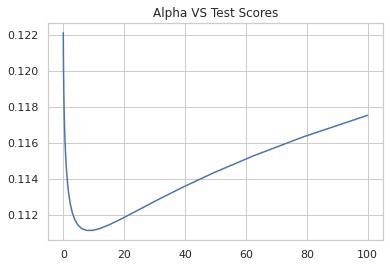

In [43]:
plt.plot(alphas,test_scores)
plt.title('Alpha VS Test Scores')

As shown in the graph, when alpha = 5~20, score got the best score around 0.1115.

In [44]:
ridge = Ridge(alpha=10)
ridge.fit(train.values, target_variable)
np.sqrt(-cross_val_score(ridge, train.values, target_variable, cv=5, scoring="neg_mean_squared_error")).mean()

0.11395725795617657

## Elastic Net Regression

In [45]:
Enet = ElasticNet(alpha=0.001)
Enet.fit(train.values, target_variable)
np.sqrt(-cross_val_score(Enet, train.values, target_variable, cv=5, scoring="neg_mean_squared_error")).mean()

0.11138642103403273

## Gradient Boosting Regression

In [46]:
gboosting = GradientBoostingRegressor(n_estimators=350)
gboosting.fit(train.values, target_variable)
np.sqrt(-cross_val_score(gboosting, train.values, target_variable, cv=5, scoring="neg_mean_squared_error")).mean()

0.12072328237261729

## XG Boosting

In [47]:
xgboosting = xgb.XGBRegressor(n_estimators=450)
xgboosting.fit(train.values, target_variable)
np.sqrt(-cross_val_score(xgboosting, train.values, target_variable, cv=5, scoring="neg_mean_squared_error")).mean()

[22:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.1207520414745038

## Random Forest

In [48]:
rf = RandomForestRegressor(n_estimators=550, max_features=0.3)
rf.fit(train.values, target_variable)
np.sqrt(-cross_val_score(rf, train.values, target_variable, cv=5, scoring="neg_mean_squared_error")).mean()

0.13366539241594136

# Averaging Predictions

In [49]:
lasso_predict = lasso.predict(test.values)
ridge_predict = ridge.predict(test.values)
eNet_predict = Enet.predict(test.values)
gboost_predict = gboosting.predict(test.values)
xgboost_predict = xgboosting.predict(test.values)
rf_predict = rf.predict(test.values)
test_score = rf.score(train.values, target_variable)
print(test_score) # here just to print out the test score for random forest
y_lasso = np.expm1(lasso_predict)
y_ridge = np.expm1(ridge_predict)
y_eNet = np.expm1(eNet_predict)
y_gboost = np.expm1(gboost_predict)
y_xgboost = np.expm1(xgboost_predict)
y_rf = np.expm1(rf_predict)

0.9850074485800249


In [50]:
y_final = (y_lasso+y_ridge+y_eNet+y_gboost+y_xgboost+y_rf)/6
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_final
sub.to_csv('avrage.csv',index=False)

## Stacking models
Stacking models is a method of integrating multiple models to obtain smaller prediction variances. The purpose of fusion is to make the distribution of their residuals more uniform.

In [51]:
xgb_model_L2=XGBRegressor(silent=True,random_state=1)
models=[lasso, ridge, Enet] # Xgboosting and Gboosting are not used since they performed bad
labels = ['Lasso Regression','Ridge Regression' , 'Elastic Net']

In [52]:
from sklearn.model_selection import cross_validate
print('5-fold cross validation:\n')
for model, label in zip(models,labels):

    scores = cross_validate(model, train.values, target_variable, 
                                              cv=5,scoring=('r2', 'neg_mean_squared_error'),
                            return_train_score=True)
    print("R_squered: %0.5f (+/- %0.5f) [%s]"
          % (scores['test_r2'].mean(), scores['test_r2'].std(), "Mean_squared_error: %0.5f (+/- %0.5f) [%s]"
          % (-scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std(), label)))

5-fold cross validation:

R_squered: 0.92190 (+/- 0.00488) [Mean_squared_error: 0.01239 (+/- 0.00129) [Lasso Regression]]
R_squered: 0.91794 (+/- 0.00454) [Mean_squared_error: 0.01302 (+/- 0.00129) [Ridge Regression]]
R_squered: 0.92158 (+/- 0.00489) [Mean_squared_error: 0.01244 (+/- 0.00128) [Elastic Net]]


In [53]:
stack = StackingCVRegressor(regressors=models,
                            meta_regressor=xgb_model_L2, cv=10,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False
                           )

In [54]:
stack.fit(train.values, target_variable)
stack_pred = stack.predict(test.values)
print(stack_pred)

[11.726566 12.070872 12.118302 ... 12.024616 11.687906 12.308415]


In [55]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.exp(stack_pred)-1
sub.to_csv('stack_prediction.csv',index=False)

We submitted the prediction on kaggle, the result was good. The score (Root Mean Squared Logarithmic Error) was 0.12497. We got the top 15% of the competition.

## Predict train

In [56]:
pred = stack.predict(train.values)

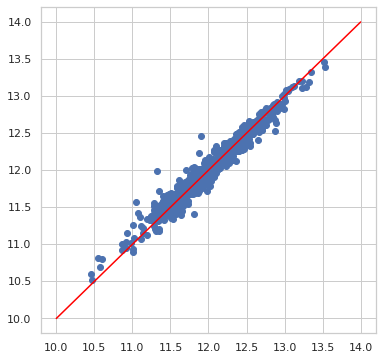

In [57]:
plt.figure(figsize=(6, 6))
plt.scatter(target_variable, pred)
plt.plot(range(10, 15), range(10, 15), color="red")

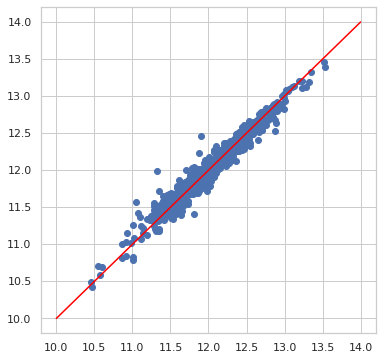

In [58]:
q1 = pd.DataFrame(pred).quantile(0.0055)
pre_df = pd.DataFrame(pred)
pre_df["SalePrice"] = pred
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.99
pred = np.array(pre_df.SalePrice)
plt.figure(figsize=(6, 6))
plt.scatter(target_variable, pred)
plt.plot(range(10, 15), range(10, 15), color="red")

In [59]:
sub = pd.DataFrame()
sub['Id'] = test_ID
test_predict = stack.predict(test.values)
q1 = pd.DataFrame(test_predict).quantile(0.0055)
pre_df = pd.DataFrame(test_predict)
pre_df["SalePrice"] = test_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.96
test_predict = np.array(pre_df.SalePrice)
sub['SalePrice'] = np.exp(test_predict)-1
sub.to_csv('stack2.csv',index=False)

We tried manually adjust the model, the final score is 0.13797, which is not an improvement of our best score.

References


*   https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#Modelling
*   https://www.kaggle.com/jolasa/eda-anda-data-preparation-4th-place?scriptVersionId=21118720
*   https://www.kaggle.com/apapiu/regularized-linear-models

